# Face Recognition with OpenCV and Python

The Face Recognition process is divided into three steps.

1. **Prepare training data:** In this step we will read training images for each person/subject along with their labels, detect faces from each image and assign each detected face an integer label of the person it belongs to.
2. **Train Face Recognizer:** In this step we will train OpenCV's LBPH face recognizer by feeding it the data we prepared in step 1.
3. **Testing:** In this step we will pass some test images to face recognizer and see if it predicts them correctly.

### Import Required Modules

Before starting the actual coding we need to import the required modules for coding. So let's import them first. 

- **cv2:** is _OpenCV_ module for Python which we will use for face detection and face recognition.
- **os:** We will use this Python module to read our training directories and file names.
- **numpy:** We will use this module to convert Python lists to numpy arrays as OpenCV face recognizers accept numpy arrays.

In [1]:
#import OpenCV module
import cv2
#import os module for reading training data directories and paths
import os
#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Training Data

The more images used in training the better. Normally a lot of images are used for training a face recognizer so that it can learn different looks of the same person.

All training data is inside _`train-images`_ folder. _`train-images`_ folder contains one folder for each person and each folder is named with the person's name.
The _`test-images`_ folder contains images that we will use to test our face recognizer after it has been successfully trained.

As OpenCV face recognizer accepts labels as integers so we need to define a mapping between integer labels and persons actual names so below I am defining a mapping of persons integer labels and their respective names. 

### Prepare training data

In [9]:
#function to detect face using OpenCV
def detect_face(img):
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #load OpenCV face detector, I am using LBP which is fast
    face_cascade = cv2.CascadeClassifier('opencv-files/lbpcascade_frontalface.xml')

    #let's detect multiscale (some images may be closer to camera than others) images
    #result is a list of faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
    
    #if no faces are detected then return original img
    if (len(faces) == 0):
        return None, None
    
    #under the assumption that there will be only one face,
    #extract the face area
    (x, y, w, h) = faces[0]
    
    #return only the face part of the image
    return gray[y:y+w, x:x+h], faces[0]

In [95]:
#there is no label 0 in our training data so subject name for index/label 0 is empty
subjects = [""]
with open("subjects.txt", "wb") as fp:  
        pickle.dump(subjects, fp)

In [71]:
#this function will read all persons' training images, detect face from each image and will return two lists of exactly same size, one list of faces and another list of labels for each face
def prepare_training_data(data_folder_path):
    
    #------STEP-1--------
    #get the directories (one directory for each subject) in data folder
    dirs = os.listdir(data_folder_path)
    
    #list to hold all subject faces
    faces = []
    #list to hold labels for all subjects
    labels = []
    #there is no label 0 in our training data so subject name for index/label 0 is empty
    with open("subjects.txt", "rb") as fp:   
        subjects = pickle.load(fp)
    
    #let's go through each directory and read images within it
    for dir_name in dirs:
            
        #------STEP-2--------
        #extract label number of subject from dir_name
        subjects.append(dir_name)
        
        #build path of directory containin images for current subject subject
        subject_dir_path = data_folder_path + "/" + dir_name
        
        #get the images names that are inside the given subject directory
        subject_images_names = os.listdir(subject_dir_path)
        
        #------STEP-3--------
        #go through each image name, read image, detect face and add face to list of faces
        for image_name in subject_images_names:
            
#             #ignore system files like .DS_Store
#             if image_name.startswith("."):
#                 continue;
            
            #build image path
            image_path = subject_dir_path + "/" + image_name

            #read image
            image = cv2.imread(image_path)
            
            #display an image window to show the image 
            cv2.imshow("Training on image...", image)
            cv2.waitKey(100)
            
            #detect face
            face, rect = detect_face(image)
            
            #------STEP-4--------
            if face is not None:
                #add face to list of faces
                faces.append(face)
                #add label for this face
                labels.append(subjects.index(dir_name))
            
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    return faces, labels, subjects

In [96]:
#let's first prepare our training data
print("Preparing data...")
faces, labels, subjects = prepare_training_data("train-images")
print("Data prepared")

#print total faces and labels
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  129
Total labels:  129


In [87]:
#Pickling
def saveImages():
    with open("faces.txt", "wb") as fp:   
        pickle.dump(faces, fp)
    with open("labels.txt", "wb") as fp:  
        pickle.dump(labels, fp)
    with open("subjects.txt", "wb") as fp:  
        pickle.dump(subjects, fp)

In [97]:
saveImages()

In [42]:
# Unpickling
def loadImages():
    with open("faces.txt", "rb") as fp:   
        faces = pickle.load(fp)
    with open("labels.txt", "rb") as fp:   
        labels = pickle.load(fp)
    with open("subjects.txt", "rb") as fp:   
        subjects = pickle.load(fp)

### Add Training Images

In [100]:
newfaces=[]
newlabels=[]
folname=input('Enter folder name')
newfaces, newlabels, newsubjects = prepare_training_data(folname)
newsubjects.pop(0)
print("Data prepared")

#print total faces and labels
print("Total faces added: ", len(newfaces))
print("Total labels added: ", len(newlabels))

Enter folder nametrain-new-images
Data prepared
Total faces added:  35
Total labels added:  35


In [101]:
loadImages()

In [102]:
faces.extend(newfaces)
labels.extend(newlabels)
subjects=newsubjects

In [103]:
saveImages()

In [110]:
subjects

['Adrien_Brody',
 'Bill_Gates',
 'David_Beckham',
 'Jennifer_Aniston',
 'Jennifer_Lopez',
 'Serena_Williams',
 'Tiger_Woods',
 'Arnold_Schwarzenegger']

### Train Face Recognizer

As we know, OpenCV comes equipped with three face recognizers.

1. EigenFace Recognizer: This can be created with `cv2.face.createEigenFaceRecognizer()`
2. FisherFace Recognizer: This can be created with `cv2.face.createFisherFaceRecognizer()`
3. Local Binary Patterns Histogram (LBPH): This can be created with `cv2.face.LBPHFisherFaceRecognizer()`

We are going to use LBPH face recognizer but you can use any face recognizer of your choice. No matter which of the OpenCV's face recognizer you use the code will remain the same. You just have to change one line, the face recognizer initialization line given below. 

In [106]:
# #create our LBPH face recognizer 
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

# #or use EigenFaceRecognizer by replacing above line with 
# face_recognizer = cv2.face.EigenFaceRecognizer_create()

# #or use FisherFaceRecognizer by replacing above line with 
# face_recognizer = cv2.face.FisherFaceRecognizer_create()

Now that we have initialized our face recognizer and we also have prepared our training data, it's time to train the face recognizer. We will do that by calling the `train(faces-vector, labels-vector)` method of face recognizer. 

In [107]:
#train our face recognizer of our training faces
face_recognizer.train(faces, np.array(labels))

### Prediction

In [5]:
#function to draw rectangle on image according to given (x, y) coordinates and given width and heigh
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
#function to draw text on give image starting from passed (x, y) coordinates. 
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

First function `draw_rectangle` draws a rectangle on image based on passed rectangle coordinates. It uses OpenCV's built in function `cv2.rectangle(img, topLeftPoint, bottomRightPoint, rgbColor, lineWidth)` to draw rectangle. We will use it to draw a rectangle around the face detected in test image.

Second function `draw_text` uses OpenCV's built in function `cv2.putText(img, text, startPoint, font, fontSize, rgbColor, lineWidth)` to draw text on image. 

Now that we have the drawing functions, we just need to call the face recognizer's `predict(face)` method to test our face recognizer on test images. Following function does the prediction for us.

In [115]:
#this function recognizes the person in image passed and draws a rectangle around detected face with name of the subject
predicted=[]
def predict(test_img):
    #make a copy of the image as we don't want to change original image
    img = test_img.copy()
    #detect face from the image
    face, rect = detect_face(img)
    
    if face is None:
        print('Failed to detect image')
        readImage()
        return
            
    #predict the image using our face recognizer 
    label= face_recognizer.predict(face)

    #get name of respective label returned by face recognizer
    label_text = subjects[label[0]-1]
    predicted.append(label_text)
    
    #draw a rectangle around face detected
    draw_rectangle(img, rect)
    #draw name of predicted person
    draw_text(img, label_text, rect[0], rect[1]-5)
    
    return img

Predicting images...


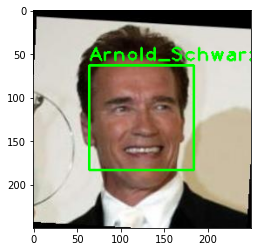

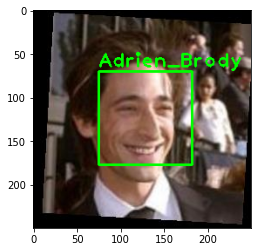

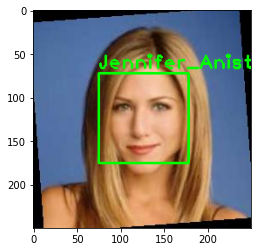

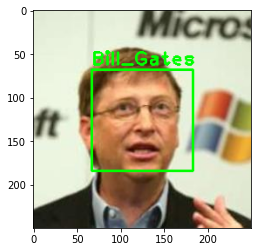

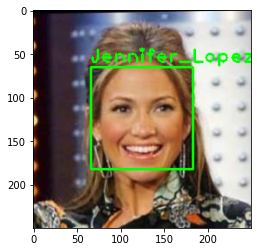

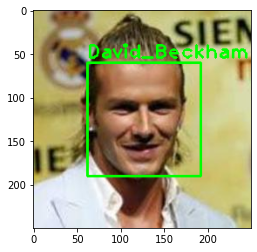

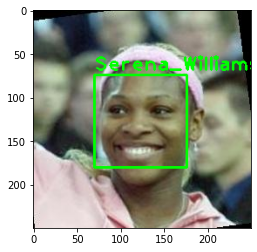

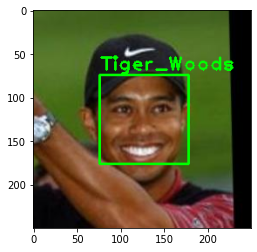

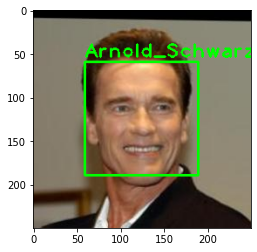

In [116]:
print("Predicting images...")

images = os.listdir('test-images')
predicted=[]

for image_name in images:
            
        #build image path
        image_path = "test-images/" + image_name

        #read image
        test_img = cv2.imread(image_path)
        
        #perform a prediction
        predicted_img = predict(test_img)
        
        #displayimages
        plt.imshow(cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB))
        plt.show()
    

# #load test images
# test_img1 = cv2.imread("test-images/test_1.jpg")
# test_img2 = cv2.imread("test-images/test_2.jpg")
# test_img3 = cv2.imread("test-images/test_3.jpg")
# test_img4 = cv2.imread("test-images/test_4.jpg")
# test_img5 = cv2.imread("test-images/test_5.jpg")


# #perform a prediction
# predicted=[]
# predicted_img1 = predict(test_img1)
# predicted_img2 = predict(test_img2)
# predicted_img3 = predict(test_img3)
# predicted_img4 = predict(test_img4)
# predicted_img5 = predict(test_img5)
# print("Prediction complete")

# #displayimages
# plt.imshow(cv2.cvtColor(predicted_img1, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(predicted_img2, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(predicted_img3, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(predicted_img4, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(predicted_img5, cv2.COLOR_BGR2RGB))
# plt.show()
# # plt.imshow(subjects[1], predicted_img1)
# # plt.imshow(subjects[2], predicted_img2)
# # cv2.waitKey()
# # # cv2.destroyAllWindows()

In [66]:
predicted

['Adrien_Brody',
 'Jennifer_Aniston',
 'Bill_Gates',
 'Jennifer_Lopez',
 'David_Beckham',
 'Serena_Williams',
 'Tiger_Woods',
 'Adrien_Brody']

In [11]:
def captureImg():

    cam = cv2.VideoCapture(0)

    cv2.namedWindow("test")

    img_counter = 0

    while True:
        ret, frame = cam.read()
        if not ret:
            print("failed to grab frame")
            break
        if not frame is None: 
                if not ret: 
                    continue
        cv2.imshow("test", frame)

        k = cv2.waitKey(1)
        if k%256 == 27:
            # ESC pressed
            print("Escape hit, closing...")
            break
        elif k%256 == 32:
            # SPACE pressed
            img_name = "opencv_frame_{}.png".format(img_counter)
            cv2.imwrite(img_name, frame)
            print("{} written!".format(img_name))
            img_counter += 1

    cam.release()

    cv2.destroyAllWindows()

In [10]:
def readImage():
    captureImg()
    #read image
    test_img = cv2.imread('opencv_frame_0.png')
    #perform a prediction
    predicted_img = predict(test_img)
    #displayimages
    plt.imshow(cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB))
    plt.show()

In [14]:
# readImage()

In [13]:
def liveRecognize():    
    webcam = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier('opencv-files/lbpcascade_frontalface.xml')
    (width, height) = (130, 100)
    while True:
        (_, im) = webcam.read()
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face = gray[y:y + h, x:x + w]
            face_resize = cv2.resize(face, (width, height))
            #predict the image using our face recognizer 
            label= face_recognizer.predict(face_resize)
            #get name of respective label returned by face recognizer
            label_text = subjects[label[0]]
            cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 3)

            if label[1]<90:

               cv2.putText(im, '% s - %.0f' %
    (label_text, label[1]), (x-10, y-10),
    cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0))
            else:
              cv2.putText(im, 'not recognized',
    (x-10, y-10), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0))

        cv2.imshow('OpenCV', im)

        key = cv2.waitKey(10)
        if key == 27:
            break

    webcam.release()

    cv2.destroyAllWindows()

In [67]:
liveRecognize()